In [3]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
resp = nsfg.ReadFemResp() 

In [4]:
timesmar=resp['timesmar']
timesmar=timesmar.dropna()
jintendn=resp['jintendn']
jintendn=jintendn.dropna() 

In [5]:
meanoftimesmar, stdoftimesmar = timesmar.mean(), timesmar.std()
meanoftimesmar, stdoftimesmar 

(1.387057682985943, 4.297113023252983)

In [6]:
meanofjintendn, stdofjintendn= jintendn.mean(), jintendn.std()
meanofjintendn, stdofjintendn 

(2.7052556818181817, 9.710108051456992)

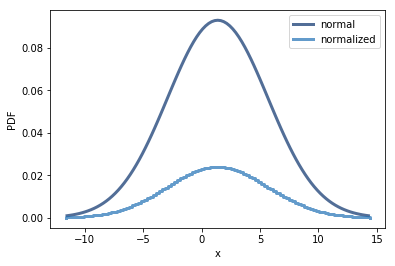

In [7]:
pdf = thinkstats2.NormalPdf(meanoftimesmar, stdoftimesmar)
pdf.Density(meanoftimesmar+stdoftimesmar )
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normalized')
thinkplot.Config(xlabel='x', ylabel='PDF')

From there we can say that its normal distribution. Also,we can see diffrences between Normal Probability Density Functions, and  Normalized Probability Density Functions


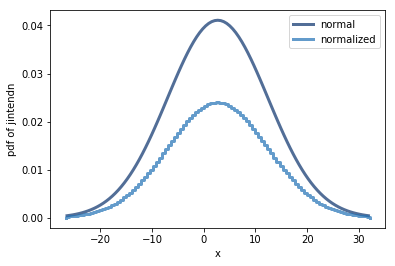

In [8]:
pdfofjintendn = thinkstats2.NormalPdf(meanofjintendn, stdofjintendn)
pdfofjintendn.Density(meanofjintendn+stdofjintendn )
thinkplot.Pdf(pdfofjintendn, label='normal') 
thinkplot.Config(xlabel='x', ylabel='pdf of jintendn')
pmfofjintendn = pdfofjintendn.MakePmf()
thinkplot.Pmf(pmfofjintendn, label='normalized')
thinkplot.Config(xlabel='x', ylabel='pdf of jintendn')

From there we can say that its normal distribution. Also,we can see diffrences between Normal Probability Density Functions, and  Normalized Probability Density Functions


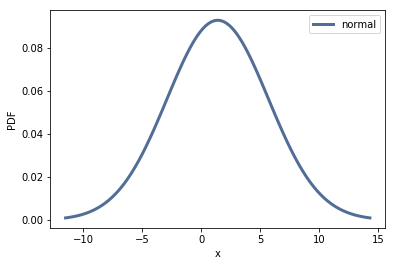

In [9]:
timesmar1=resp['timesmar']
meanoftimesmar1, stdoftimesmar1 = timesmar1.mean(), timesmar1.std()
pdf1 = thinkstats2.NormalPdf(meanoftimesmar1, stdoftimesmar1)
pdf1.Density(meanoftimesmar1+stdoftimesmar1 )
thinkplot.Pdf(pdf1, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

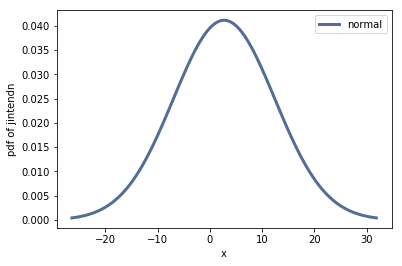

In [10]:
jintendn1=resp['jintendn']
meanofjintendn1, stdofjintendn1= jintendn1.mean(), jintendn1.std()
pdfofjintendn1 = thinkstats2.NormalPdf(meanofjintendn1, stdofjintendn1)
pdfofjintendn1.Density(meanofjintendn1+stdofjintendn1)
thinkplot.Pdf(pdfofjintendn1, label='normal')
thinkplot.Config(xlabel='x', ylabel='pdf of jintendn')


In [11]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [12]:
RawMoment(timesmar, 1), RawMoment(timesmar, 2), RawMoment(timesmar, 3)

(1.387057682985943, 20.384634028114398, 1841.8805138148327)

In [13]:
RawMoment(jintendn, 1), RawMoment(jintendn, 2), RawMoment(jintendn, 3)

(2.7052556818181817, 101.53764204545455, 9643.665482954546)

In [14]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(jintendn) 

2.7052556818181817

In [15]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(timesmar) 

1.387057682985943

In [16]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

In [17]:
CentralMoment(jintendn, 1), CentralMoment(jintendn, 2), CentralMoment(jintendn, 3)

(-2.6620120249535003e-15, 94.21923374144507, 8859.205965061536)

In [18]:
CentralMoment(timesmar, 1), CentralMoment(timesmar, 2), CentralMoment(timesmar, 3)

(-1.2793127358889589e-15, 18.460705012183197, 1762.3937251304174)

In [19]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(timesmar)

18.460705012183197

In [20]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(jintendn)

94.21923374144507

In [21]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [22]:
StandardizedMoment(timesmar, 1), StandardizedMoment(timesmar, 2), StandardizedMoment(timesmar, 3)

(-2.9775055665951693e-16, 1.0000000000000002, 22.219307220678285)

In [23]:
StandardizedMoment(jintendn, 1), StandardizedMoment(jintendn, 2), StandardizedMoment(jintendn, 3)

(-2.742459539535891e-16, 1.0, 9.686914057933583)

In [24]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(timesmar ) 

22.219307220678285

Normally a positive skewness indicates that the distribution has'not a longer tail on the left, has a longer tail on the right. In that case, the mean is usually more than the median.

In [25]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(jintendn ) 

9.686914057933583

Normally a positive skewness indicates that the distribution has'not a longer tail on the left, has a longer tail on the right. In that case, the mean is usually more than the median. from there we can say timesmar has more longer tail on the right than jintendn

In [26]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [27]:
Mean(timesmar), Median(timesmar)

(1.387057682985943, 1.0)

In [28]:
Mean(jintendn), Median(jintendn)

(2.7052556818181817, 1.0)

In [29]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [30]:
PearsonMedianSkewness(timesmar)

0.27025442021022084

Pearson's skewness is positive, indicating that the distribution of timesmar is slightly skewed to the right.

In [31]:
PearsonMedianSkewness(jintendn) 

0.5270368429720083

Pearson's skewness is positive, indicating that the distribution of jintendn is slightly skewed to the right.

In [32]:
def SampleRows(df, nrows, replace=False):
    # replace = same row could be chosen more than one or not
    indices = np.random.choice(df.index, nrows, replace=replace)
    print(indices)
    sample = df.loc[indices]
    return sample

In [33]:
sample = SampleRows(resp,5000)
timesmar, jintendn = sample.timesmar, sample.jintendn

[3883 3066 6522 ... 3852  689 6784]


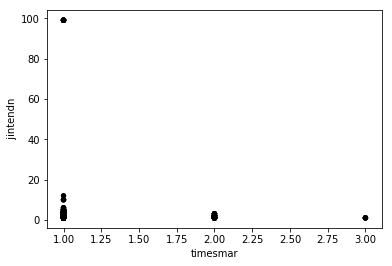

In [34]:
thinkplot.Scatter( timesmar, jintendn, alpha=1,color='black')
thinkplot.Config(xlabel='timesmar',
                 ylabel=' jintendn',
                 legend=False) 

The data fall in obvious columns because they were rounded off. We can reduce this visual artifact by adding or substracting some random noice to the data.


In [35]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values


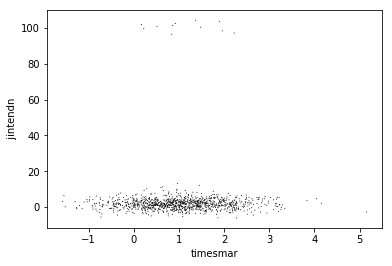

In [44]:
timesmar = Jitter(timesmar,0.5)
jintendn = Jitter(jintendn, 1.4)
thinkplot.Scatter(timesmar, jintendn, alpha=1,s=1,color='black')
thinkplot.Config(xlabel='timesmar',
                 ylabel=' jintendn',
                 legend=False)

there is so little darkness between 1 to 2 when approach to timesmar.actually its about the alpha and s number. 
That's better. This version of the figure shows the location and shape of the distribution most accurately. There isnot  some apparent columns and rows where, most likely, people reported their height and weight using rounded values. If that effect is important, this figure makes it apparent; if it is not important, we could use more aggressive jittering to minimize it.

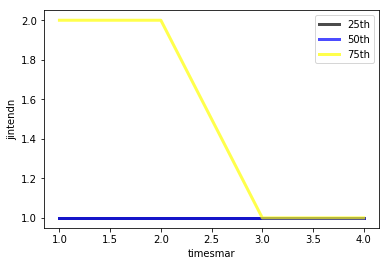

In [37]:
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
bins = np.arange(-1,5, 1)
indices = np.digitize(cleaned.timesmar, bins)
groups = cleaned.groupby(indices)
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]
mean_timesmar
CustomColors = ["black","blue","yellow"] 
percent =[25, 50, 75] 
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 legend=True)

 we can see that most number placed 50th and 75th percentile 

In [38]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
cleaned = resp.dropna(subset=['timesmar', 'jintendn'])
timesmar, jintendn = cleaned.timesmar, cleaned.jintendn
Cov(timesmar, jintendn)
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

first,Covariance is useful for some calculations, but it doesn't mean much by itself. The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [39]:
Corr(timesmar, jintendn)

-0.03652346652385939

The correlation of timesmar and jintendn is about -0.036, which is almost not strong correlation,but there is correlation.

In [40]:
from scipy import stats
stats.pearsonr(timesmar, jintendn)

(-0.03652346652385939, 0.23171606728546632)

we can say that from result of Pearson Correlation p-value which is 0.231 larger than alpha value=0.05, there isnot significant correlation. Pearson Correlation is almost -0.036 so we can say that there is negative correlation,so Negative correlations imply that as timesmar increases, jintendn decreases.

In [41]:
stats.spearmanr(timesmar, jintendn)

SpearmanrResult(correlation=-0.08337747790348256, pvalue=0.006256598683894432)

we can say that from result of sperman p-value which is 0.0062 smaller than alpha value=0.05, there is significant correlation. sperman correlation is almost -0.084 so we can say that there is negative correlation,so Negative correlations imply that as timesmar increases, jintendn decreases.

# Difference Bewteen Pearson Correlation and Spearman Correlation 
The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

from example of our result, we can say that Pearson Correlation p-value and  sperman correlation p-value are different and that's why significant of correlation are changed with respect to this p-value.

from our result of Pearson correlation we can say that there is not linear relationship between timesmar and jintendn. 
Also, from our result of Spearman correlation between timesmar and jintendn variables tend to change together, but not necessarily at a constant rate